In [38]:
# Import the necessary modules and libraries.
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [39]:
# Create a random dataset.
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(20))

In [51]:
# Fit regression model.
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(min_samples_leaf=9)
regr_4 = DecisionTreeRegressor()
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)

# Predicting.
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

# Error.
y_test = np.sin(X_test).ravel()
mse1 = mean_squared_error(y_test, y_1)
mse2 = mean_squared_error(y_test, y_2)
mse3 = mean_squared_error(y_test, y_3)
mse4 = mean_squared_error(y_test, y_4)

print('mse1: ',mse1)
print('mse2: ',mse2)
print('mse3: ',mse3)
print('mse4: ',mse4)

mse1:  0.04316021725207621
mse2:  0.1070646122610927
mse3:  0.023283836606877877
mse4:  0.19392085158174666


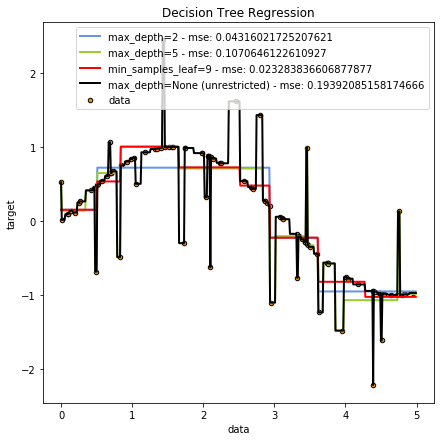

In [56]:
# Plot the results.
plt.figure(figsize=(7,7))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2 - mse: "+str(mse1), linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5 - mse: "+str(mse2), linewidth=2)
plt.plot(X_test, y_3, color="red", label="min_samples_leaf="+str(regr_3.min_samples_leaf)+' - mse: '+str(mse3), linewidth=2)
plt.plot(X_test, y_4, color="black", label="max_depth=None (unrestricted) - mse: "+str(mse4), linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Observações

Podemos ver que, se a profundidade máxima da árvore (controlada pelo parâmetro max_depth) for definida com um valor muito alto, as árvores de decisão aprendem detalhes muito 'precisos' dos dados de treinamento e com isso, aprendem também o ruído presente nos dados, ou seja, elas se sobreajustam.